## Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/MSBA Summer/BA890/'

Mounted at /content/drive


In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the dataset
df = pd.read_csv(data_folder+'rideshare_kaggle.csv')

In [4]:
# Examine the dataset
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## Data Preprocessing

During preprocessing, several key steps were undertaken to ensure the dataset's integrity and readiness for analysis. Initially, a thorough check for missing values was performed, revealing that the 'price' column had some missing data. Given that these missing values represented less than 8% of the total entries and the 'price' column's significance to the analysis, rows with missing values were dropped to maintain analysis accuracy.
Additionally, unnecessary columns, including duplicates and those providing no substantial analytical value (e.g., the ozone index and sunrise time), were removed. This step reduced noise and improved the efficiency of subsequent analysis.


### I. Check Missing Values

<Axes: >

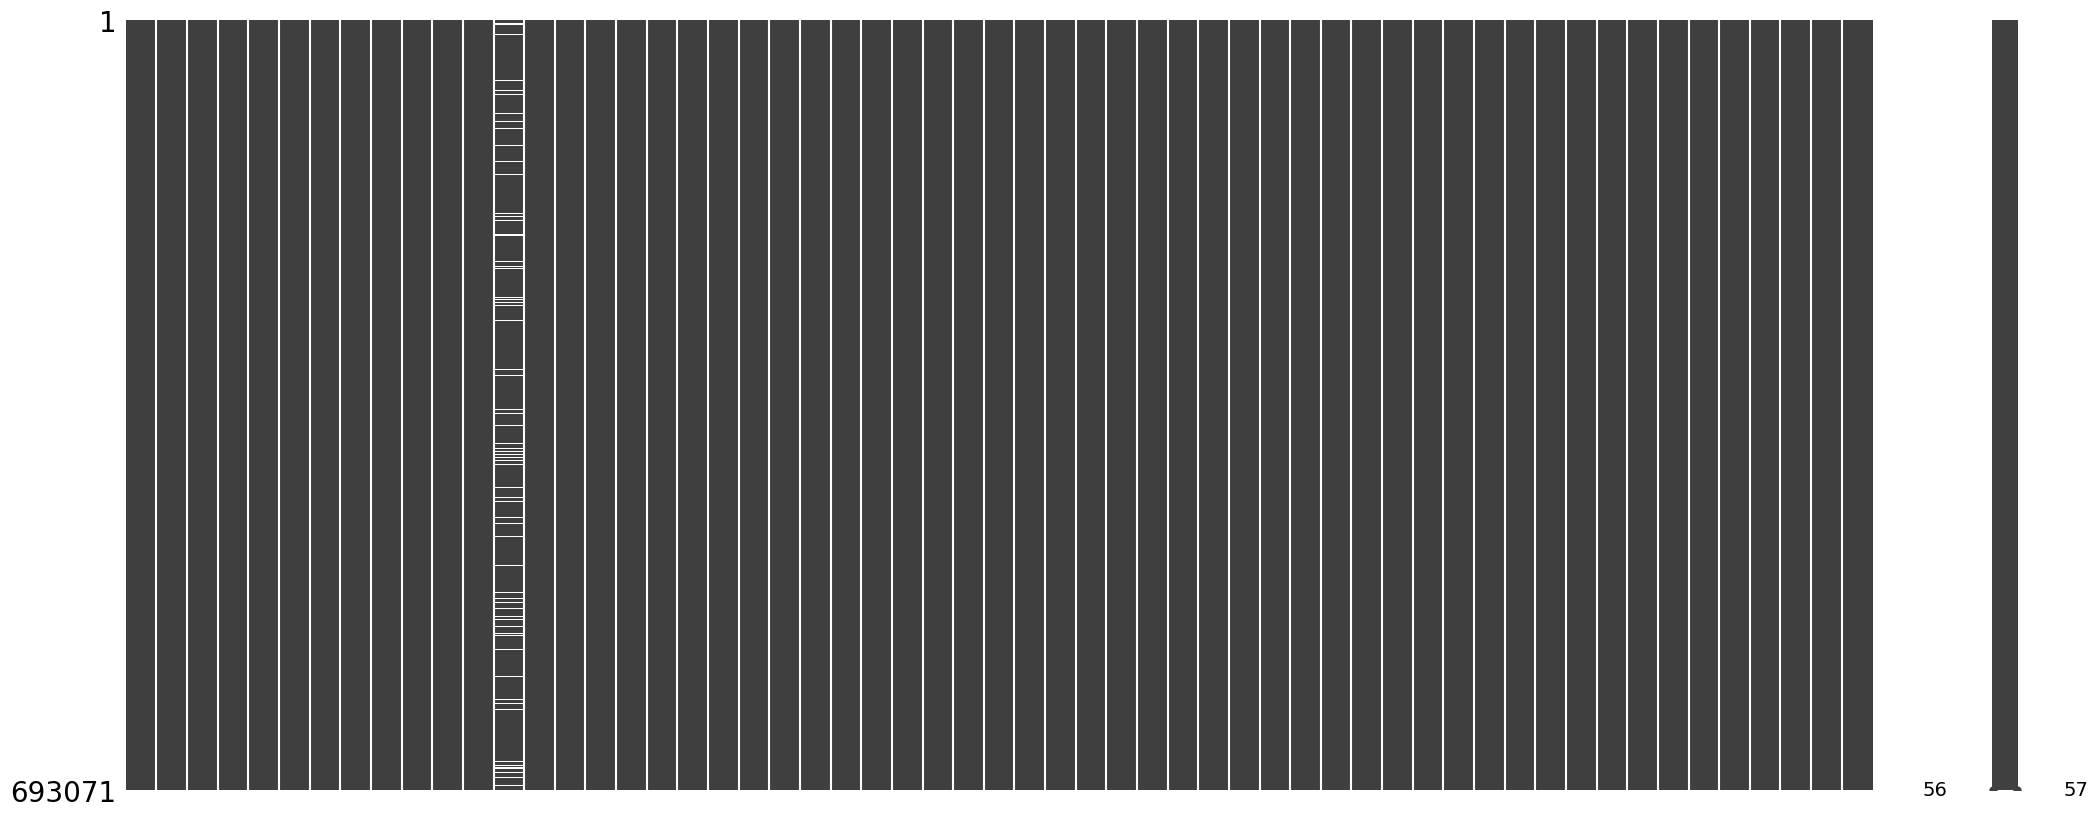

In [6]:
# Plot a msno matrix to show NaN value distribution
import missingno as msno
msno.matrix(df)

In [7]:
#check null values
df.isnull().sum()

,0
id,0
timestamp,0
hour,0
day,0
month,0
datetime,0
timezone,0
source,0
destination,0
cab_type,0


In [8]:
# Examine the dataset's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [9]:
# Examine the dataset's statistic info
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


### II. Drop Unused Columns

In [10]:
# Drop unused columns - these columns won't be used in further analysis
df = df[['latitude', 'longitude','hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name', 'price', 'distance', 'temperature', 'short_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'visibility', 'windBearing', 'uvIndex']]
df.head(5)

,latitude,longitude,hour,day,month,source,destination,cab_type,name,price,distance,temperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,visibility,windBearing,uvIndex
0,42.2148,-71.033,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,42.34,Mostly Cloudy,0.0000,0.0,0.68,8.66,10.000,57,0
1,42.2148,-71.033,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,43.58,Rain,0.1299,1.0,0.94,11.98,4.786,90,0
2,42.2148,-71.033,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,38.33,Clear,0.0000,0.0,0.75,7.33,10.000,240,0
3,42.2148,-71.033,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,34.38,Clear,0.0000,0.0,0.73,5.28,10.000,310,0
4,42.2148,-71.033,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,37.44,Partly Cloudy,0.0000,0.0,0.70,9.14,10.000,303,0


### III. Drop Null Values

In [11]:
# Drop NaN values
df = df.dropna()

In [12]:
#check null values
df.isnull().sum()

,0
latitude,0
longitude,0
hour,0
day,0
month,0
source,0
destination,0
cab_type,0
name,0
price,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   latitude           637976 non-null  float64
 1   longitude          637976 non-null  float64
 2   hour               637976 non-null  int64  
 3   day                637976 non-null  int64  
 4   month              637976 non-null  int64  
 5   source             637976 non-null  object 
 6   destination        637976 non-null  object 
 7   cab_type           637976 non-null  object 
 8   name               637976 non-null  object 
 9   price              637976 non-null  float64
 10  distance           637976 non-null  float64
 11  temperature        637976 non-null  float64
 12  short_summary      637976 non-null  object 
 13  precipIntensity    637976 non-null  float64
 14  precipProbability  637976 non-null  float64
 15  humidity           637976 non-null  float64
 16  windSpe

### IV. Export as CSV file

In [192]:
df.to_csv('finalride_2.csv', index=False)

## Python Regression

### Data Preprocessing

In [16]:
# target column mapping
mapping = {'Uber':1, 'Lyft':0}
df['cab_type'] = df['cab_type'].replace(mapping)
df['cab_type'].value_counts()

,count
cab_type,
1,330568
0,307408


In [17]:
# cloumns type change
df['hour'] = df['hour'].astype('category')
df['day'] = df['day'].astype('category')
df['month'] = df['month'].astype('category')
df['source'] = df['source'].astype('category')
df['destination'] = df['destination'].astype('category')
df['short_summary'] = df['short_summary'].astype('category')

Text(0.5, 1.0, 'Correlation between each variable')

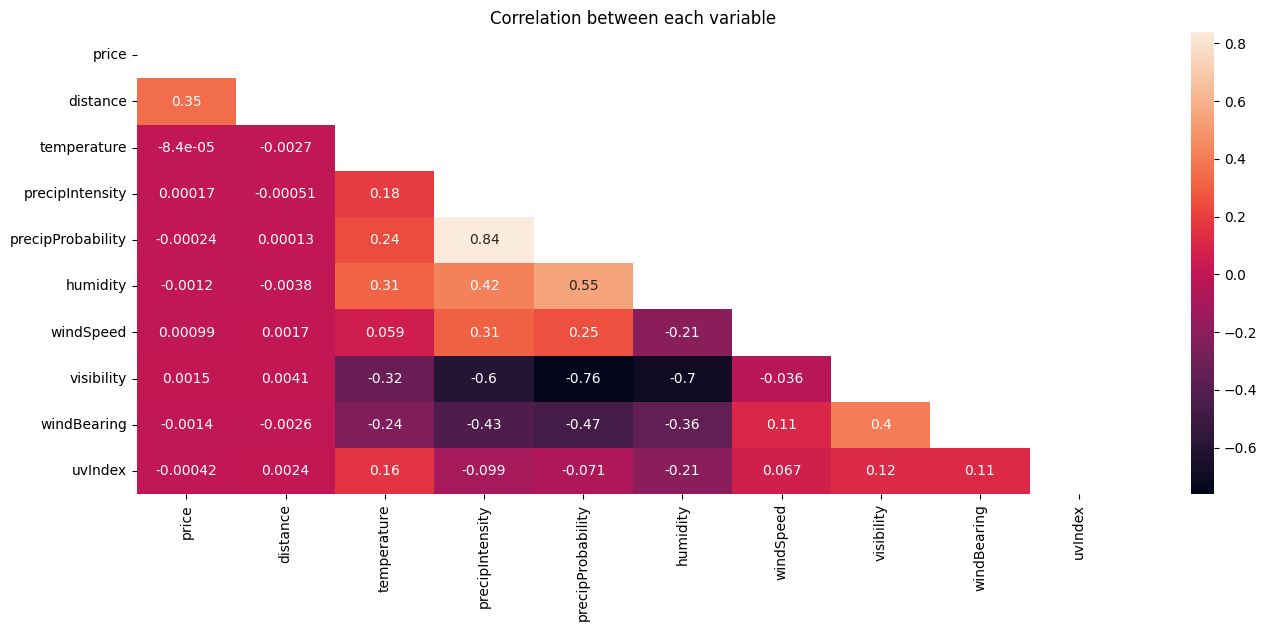

In [18]:
# find the correlation between each numerical variables: shows in heatmap
df_correlation = df[['price', 'distance', 'temperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'visibility', 'windBearing', 'uvIndex']]

plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df_correlation.corr(), dtype=bool))
heatmap = sns.heatmap(df_correlation.corr(),mask=mask,annot=True,cbar=True)
heatmap.set_title("Correlation between each variable", fontdict={'fontsize': 12})

In [19]:
uberdf = df[df['cab_type']==1]
lyftdf = df[df['cab_type']==0]

In [20]:
print('basic statistics about the uber dataset (include = "number"):')
display(uberdf.describe(include = 'number'))
print('basic statistics about the lyft dataset (include = "number"):')
display(lyftdf.describe(include = 'number'))

basic statistics about the uber dataset (include = "number"):


,latitude,longitude,cab_type,price,distance,temperature,precipIntensity,precipProbability,humidity,windSpeed,visibility,windBearing,uvIndex
count,330568.000000,330568.000000,330568.0,330568.000000,330568.000000,330568.000000,330568.000000,330568.000000,330568.000000,330568.000000,330568.000000,330568.000000,330568.000000
mean,42.337966,-71.066103,1.0,15.795343,2.191386,39.569407,0.008951,0.146757,0.741355,6.197198,8.464811,220.038041,0.248769
std,0.048059,0.020325,0.0,8.560300,1.178973,6.720901,0.026943,0.329380,0.138661,3.150455,2.603641,99.199440,0.473646
min,42.214800,-71.105400,1.0,4.500000,0.020000,18.910000,0.000000,0.000000,0.380000,0.450000,0.717000,2.000000,0.000000
25%,42.350300,-71.081000,1.0,9.000000,1.300000,36.450000,0.000000,0.000000,0.640000,3.410000,8.432000,124.000000,0.000000
50%,42.351900,-71.063100,1.0,12.500000,2.170000,40.490000,0.000000,0.000000,0.710000,5.910000,9.878000,258.000000,0.000000
75%,42.364700,-71.054200,1.0,21.500000,2.840000,43.580000,0.000000,0.000000,0.880000,8.410000,9.996000,303.000000,0.000000
max,42.366100,-71.033000,1.0,89.500000,7.860000,57.220000,0.144700,1.000000,0.960000,15.000000,10.000000,356.000000,2.000000


basic statistics about the lyft dataset (include = "number"):


,latitude,longitude,cab_type,price,distance,temperature,precipIntensity,precipProbability,humidity,windSpeed,visibility,windBearing,uvIndex
count,307408.000000,307408.000000,307408.0,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000,307408.000000
mean,42.338371,-71.066188,0.0,17.351396,2.186976,39.596384,0.008865,0.145064,0.740734,6.175610,8.473878,220.192994,0.249314
std,0.047636,0.020281,0.0,10.019171,1.086622,6.730425,0.026812,0.328123,0.138482,3.145026,2.599873,98.966402,0.475016
min,42.214800,-71.105400,0.0,2.500000,0.390000,18.910000,0.000000,0.000000,0.380000,0.450000,0.717000,2.000000,0.000000
25%,42.350300,-71.081000,0.0,9.000000,1.270000,36.450000,0.000000,0.000000,0.640000,3.410000,8.432000,124.000000,0.000000
50%,42.351900,-71.063100,0.0,16.500000,2.140000,40.490000,0.000000,0.000000,0.710000,5.910000,9.880000,258.000000,0.000000
75%,42.364700,-71.054200,0.0,22.500000,2.970000,43.580000,0.000000,0.000000,0.880000,8.410000,9.996000,303.000000,0.000000
max,42.366100,-71.033000,0.0,97.500000,6.330000,57.220000,0.144700,1.000000,0.960000,15.000000,10.000000,356.000000,2.000000


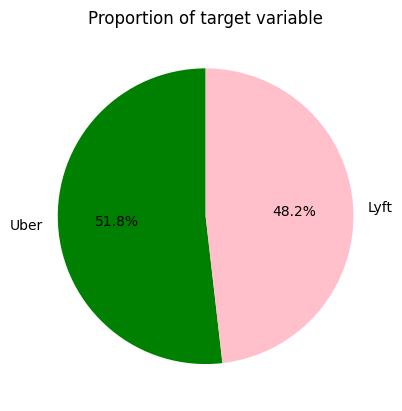

In [21]:
# pie chart of target column
rideshare_data = {'Uber': 330568, 'Lyft': 307408}

plt.pie(rideshare_data.values(), labels=rideshare_data.keys(), autopct='%1.1f%%', startangle=90, colors=['green', 'pink'])
plt.title('Proportion of target variable');

### Logistic Regression

In [22]:
# Train and Test data split
X = df.drop(['cab_type', 'name', 'latitude','longitude'],axis=1)
y = df['cab_type']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   hour               637976 non-null  category
 1   day                637976 non-null  category
 2   month              637976 non-null  category
 3   source             637976 non-null  category
 4   destination        637976 non-null  category
 5   price              637976 non-null  float64 
 6   distance           637976 non-null  float64 
 7   temperature        637976 non-null  float64 
 8   short_summary      637976 non-null  category
 9   precipIntensity    637976 non-null  float64 
 10  precipProbability  637976 non-null  float64 
 11  humidity           637976 non-null  float64 
 12  windSpeed          637976 non-null  float64 
 13  visibility         637976 non-null  float64 
 14  windBearing        637976 non-null  int64   
 15  uvIndex            637976 non-null  int

In [24]:
# pipeline construction
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('cat_encoder', OneHotEncoder())
    ])

pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include='category'))
])

pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x797d96a512d0>),
                                ('cat',
                                 Pipeline(steps=[('cat_encoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x797d960a38b0>)])

In [25]:
# logistic regression
from sklearn.linear_model import LogisticRegression
simple_pipeline = Pipeline([('preprocessor',pipeline), ('classifier',LogisticRegression(random_state=42))])
simple_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x797d96a512d0>),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x797d960a38b0>)])),
                ('classifier', LogisticRegression(random_state=42))])

In [26]:
simple_pipeline.fit(X_train,y_train) # make a training data


# probaability outcomes
y_prediction_prob = simple_pipeline.predict_proba(X_test)[:, 1] # make the prediction, the result is shown in probability(y=1)
print('prediction_probability=',y_prediction_prob)

# change it into binary outcomes
threshold = 0.5 # default
y_prediction_binary = (y_prediction_prob >= threshold).astype(int)
print('prediction_binary=',y_prediction_binary)

# Create a DataFrame with the predicted outcomes and set the index
result = pd.DataFrame({
    'probability': y_prediction_prob,
    'uber/lyft': y_prediction_binary
}, index=X_test.index)
result

prediction_probability= [0.60730605 0.55300524 0.5459999  ... 0.53009409 0.5854694  0.54633781]
prediction_binary= [1 1 1 ... 1 1 1]


,probability,uber/lyft
526491,0.607306,1
506474,0.553005,1
139551,0.546000,1
235222,0.511838,1
140436,0.507724,1
...,...,...
372617,0.532456,1
444214,0.427268,0
397982,0.530094,1
53696,0.585469,1


In [27]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_prediction_binary)
print(f'Accuracy={accuracy:.4f}')

Accuracy=0.5421


confusion matrix=



array([[25739, 51136],
       [21904, 60715]])

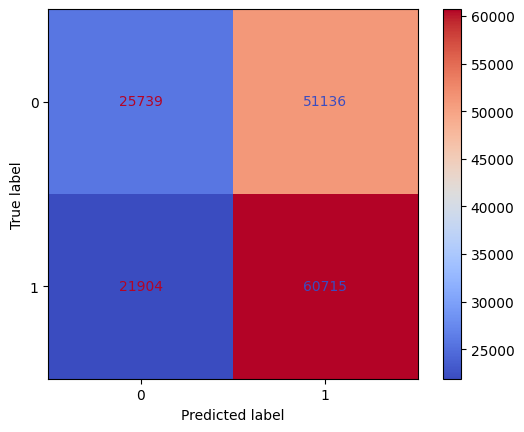

In [28]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay  as CMD
cm = confusion_matrix(y_test, y_prediction_binary)
print("confusion matrix=\n")
display(cm)
print()
# display confusion metrix in chart
image = CMD(cm , display_labels = simple_pipeline.classes_)
image.plot(cmap='coolwarm')

In [29]:
# classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_prediction_binary)
print('classification report=\n', class_report)

classification report=
               precision    recall  f1-score   support

           0       0.54      0.33      0.41     76875
           1       0.54      0.73      0.62     82619

    accuracy                           0.54    159494
   macro avg       0.54      0.53      0.52    159494
weighted avg       0.54      0.54      0.52    159494



### Scenario with Price column drop

In [30]:
X = df.drop(['cab_type', 'name', 'latitude','longitude', 'price'],axis=1)
y = df['cab_type']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   hour               637976 non-null  category
 1   day                637976 non-null  category
 2   month              637976 non-null  category
 3   source             637976 non-null  category
 4   destination        637976 non-null  category
 5   distance           637976 non-null  float64 
 6   temperature        637976 non-null  float64 
 7   short_summary      637976 non-null  category
 8   precipIntensity    637976 non-null  float64 
 9   precipProbability  637976 non-null  float64 
 10  humidity           637976 non-null  float64 
 11  windSpeed          637976 non-null  float64 
 12  visibility         637976 non-null  float64 
 13  windBearing        637976 non-null  int64   
 14  uvIndex            637976 non-null  int64   
dtypes: category(6), float64(7), int64(2)
me

In [32]:
simple_pipeline.fit(X_train,y_train) # make a training data


# probaability outcomes
y_prediction_prob = simple_pipeline.predict_proba(X_test)[:, 1] # make the prediction, the result is shown in probability(y=1)
print('prediction_probability=',y_prediction_prob)

# change it into binary outcomes
threshold = 0.5 # default
y_prediction_binary = (y_prediction_prob >= threshold).astype(int)
print('prediction_binary=',y_prediction_binary)

# Create a DataFrame with the predicted outcomes and set the index
result = pd.DataFrame({
    'probability': y_prediction_prob,
    'uber/lyft': y_prediction_binary
}, index=X_test.index)
result

prediction_probability= [0.52668958 0.51429491 0.51225643 ... 0.50264232 0.52714089 0.52724588]
prediction_binary= [1 1 1 ... 1 1 1]


,probability,uber/lyft
526491,0.526690,1
506474,0.514295,1
139551,0.512256,1
235222,0.522845,1
140436,0.521222,1
...,...,...
372617,0.506116,1
444214,0.515932,1
397982,0.502642,1
53696,0.527141,1


In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_prediction_binary)
print(f'Accuracy={accuracy:.4f}')

Accuracy=0.5180


confusion matrix=



array([[  936, 75939],
       [  937, 81682]])

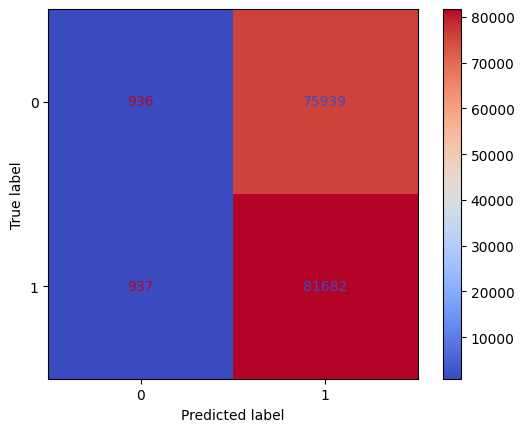

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay  as CMD
cm = confusion_matrix(y_test, y_prediction_binary)
print("confusion matrix=\n")
display(cm)
print()
# display confusion metrix in chart
image = CMD(cm , display_labels = simple_pipeline.classes_)
image.plot(cmap='coolwarm')

In [35]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_prediction_binary)
print('classification report=\n', class_report)

classification report=
               precision    recall  f1-score   support

           0       0.50      0.01      0.02     76875
           1       0.52      0.99      0.68     82619

    accuracy                           0.52    159494
   macro avg       0.51      0.50      0.35    159494
weighted avg       0.51      0.52      0.36    159494



To predict customer choices between Uber and Lyft, text-based and time columns were converted into categorical variables. The target variable, 'cab_type,' was transformed into a binary format (1 for Uber, 0 for Lyft) for logistic regression modeling.
A heatmap analysis of numeric independent variables revealed that most correlation values were below 0.5, indicating minimal multicollinearity among predictors. This suggests that the independent variables do not excessively influence each other, which supports the validity of the regression results. The dataset was balanced, with nearly equal distributions of Uber and Lyft rides.
The logistic regression model achieved an accuracy of 54%, indicating a lack of strong, discernible patterns in customer choice between the two rideshare services. Further analysis, excluding the 'price' column, resulted in a slight accuracy decrease to 52%, suggesting that while 'price' influences the model, it is not sufficient to establish a clear predictive pattern. This implies that customer choices may be influenced by more complex, unmeasured factors or personal preferences not captured in the dataset, making prediction challenging.


## SQL Queries

In [36]:
# Load the SQL extension
%load_ext google.colab.data_table

# Authenticate with your Google account
from google.colab import auth
auth.authenticate_user()

# Set your project ID
project_id = "qst843-lilasu"

# Connect to BigQuery
%load_ext google.colab.data_table
%load_ext google.cloud.bigquery

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


### Time

In [37]:
%%bigquery --project $project_id

SELECT cab_type, COUNT(id) AS count, AVG(price) AS avg_price, AVG(distance) AS avg_distance
FROM `qst843-lilasu.uberlyft.rideshare`
GROUP BY cab_type;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,count,avg_price,avg_distance
0,Lyft,307408,17.351396,2.186976
1,Uber,330568,15.795343,2.191386


In [38]:
%%bigquery --project $project_id

SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price, AVG(distance) AS avg_distance
FROM `qst843-lilasu.uberlyft.rideshare`
GROUP BY hour
ORDER BY count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,hour,count,avg_price,avg_distance
0,0,29872,16.574769,2.186149
1,23,29355,16.501090,2.174938
2,17,28075,16.607996,2.200058
3,12,28017,16.485527,2.182392
4,13,27977,16.549744,2.178512
5,14,27976,16.549882,2.195713
6,16,27972,16.513991,2.174290
7,18,27958,16.516847,2.196546
8,11,27946,16.558506,2.180736
9,10,27918,16.501021,2.204971


In [39]:
%%bigquery --project $project_id

SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price, AVG(distance) AS avg_distance
FROM `qst843-lilasu.uberlyft.rideshare`
GROUP BY hour
ORDER BY avg_distance DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,hour,count,avg_price,avg_distance
0,15,27868,16.524813,2.205854
1,21,25549,16.604323,2.205731
2,10,27918,16.501021,2.204971
3,19,25410,16.552437,2.200317
4,17,28075,16.607996,2.200058
5,8,22337,16.603326,2.199121
6,20,24620,16.599208,2.196960
7,18,27958,16.516847,2.196546
8,14,27976,16.549882,2.195713
9,2,26323,16.561803,2.192988


In [40]:
%%bigquery --project $project_id

SELECT
    CASE
      WHEN hour BETWEEN 0 AND 5 THEN 'Night'
      WHEN hour BETWEEN 6 AND 11 THEN 'Morning'
      WHEN hour BETWEEN 12 AND 17 THEN 'Noon'
      WHEN hour BETWEEN 18 AND 23 THEN 'Evening'
    END AS time_period,
    COUNT(id) AS count,
    AVG(price) AS avg_price
FROM `qst843-lilasu.uberlyft.rideshare`
GROUP BY time_period
ORDER BY count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,time_period,count,avg_price
0,Noon,167885,16.538696
1,Evening,159985,16.559548
2,Night,157155,16.551953
3,Morning,152951,16.530082


In [41]:
%%bigquery --project $project_id

SELECT
    CASE
      WHEN hour BETWEEN 0 AND 5 THEN 'Night'
      WHEN hour BETWEEN 6 AND 11 THEN 'Morning'
      WHEN hour BETWEEN 12 AND 17 THEN 'Noon'
      WHEN hour BETWEEN 18 AND 23 THEN 'Evening'
    END AS time_period,
    COUNT(id) AS count,
    AVG(price) AS avg_price
FROM `qst843-lilasu.uberlyft.rideshare`
GROUP BY time_period
ORDER BY avg_price DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,time_period,count,avg_price
0,Evening,159985,16.559548
1,Night,157155,16.551953
2,Noon,167885,16.538696
3,Morning,152951,16.530082


#### I. hour_count

In [127]:
%%bigquery --project $project_id

WITH Lyft_count AS (
  SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft'
  GROUP BY hour
  ORDER BY count DESC
  LIMIT 5
),

Uber_count AS (
  SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber'
  GROUP BY hour
  ORDER BY count DESC
  LIMIT 5
)

SELECT 'Lyft' AS cab_type, hour, count, avg_price FROM Lyft_count
UNION ALL
SELECT 'Uber' AS cab_type, hour, count, avg_price FROM Uber_count;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,hour,count,avg_price
0,Lyft,0,14657,17.450058
1,Lyft,23,14004,17.304949
2,Lyft,17,13853,17.375117
3,Lyft,12,13633,17.326157
4,Lyft,13,13503,17.353973
5,Uber,23,15351,15.767768
6,Uber,0,15215,15.731581
7,Uber,14,14670,15.812338
8,Uber,16,14623,15.740375
9,Uber,10,14593,15.763140


#### II. slot_count

In [129]:
%%bigquery --project $project_id

WITH Lyft_count AS (
  SELECT
    CASE
      WHEN hour BETWEEN 0 AND 5 THEN 'Night'
      WHEN hour BETWEEN 6 AND 11 THEN 'Morning'
      WHEN hour BETWEEN 12 AND 17 THEN 'Noon'
      WHEN hour BETWEEN 18 AND 23 THEN 'Evening'
    END AS time_period,
    COUNT(id) AS count,
    AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft'
  GROUP BY time_period
  ORDER BY count DESC
),

Uber_count AS (
  SELECT
    CASE
      WHEN hour BETWEEN 0 AND 5 THEN 'Night'
      WHEN hour BETWEEN 6 AND 11 THEN 'Morning'
      WHEN hour BETWEEN 12 AND 17 THEN 'Noon'
      WHEN hour BETWEEN 18 AND 23 THEN 'Evening'
    END AS time_period,
    COUNT(id) AS count,
    AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber'
  GROUP BY time_period
  ORDER BY count DESC
)

SELECT 'Lyft' AS cab_type, time_period, count, avg_price FROM Lyft_count
UNION ALL
SELECT 'Uber' AS cab_type, time_period, count, avg_price FROM Uber_count
ORDER BY count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,time_period,count,avg_price
0,Uber,Noon,86847,15.778968
1,Uber,Evening,82674,15.822804
2,Uber,Night,81400,15.800614
3,Lyft,Noon,81038,17.352884
4,Uber,Morning,79647,15.779307
5,Lyft,Evening,77311,17.347399
6,Lyft,Night,75755,17.359279
7,Lyft,Morning,73304,17.345820


#### III. hour_price

In [105]:
%%bigquery --project $project_id

WITH Lyft_avg_price AS (
  SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft'
  GROUP BY hour
  ORDER BY avg_price DESC
  LIMIT 5
),

Uber_avg_price AS (
  SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber'
  GROUP BY hour
  ORDER BY avg_price DESC
  LIMIT 5
)

SELECT 'Lyft' AS cab_type, hour, count, avg_price FROM Lyft_avg_price
UNION ALL
SELECT 'Uber' AS cab_type, hour, count, avg_price FROM Uber_avg_price;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,hour,count,avg_price
0,Lyft,11,13372,17.500337
1,Lyft,0,14657,17.450058
2,Lyft,22,13247,17.444252
3,Lyft,8,10700,17.402991
4,Lyft,20,11715,17.389287
5,Uber,21,13069,15.907874
6,Uber,20,12905,15.881984
7,Uber,8,11637,15.868050
8,Uber,2,13775,15.866751
9,Uber,17,14222,15.860779


#### IV. slot_price

In [106]:
%%bigquery --project $project_id

WITH Lyft_avg_price AS (
  SELECT
    CASE
      WHEN hour BETWEEN 0 AND 5 THEN 'Night'
      WHEN hour BETWEEN 6 AND 11 THEN 'Morning'
      WHEN hour BETWEEN 12 AND 17 THEN 'Noon'
      WHEN hour BETWEEN 18 AND 23 THEN 'Evening'
    END AS time_period,
    COUNT(id) AS count,
    AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft'
  GROUP BY time_period
  ORDER BY avg_price DESC
),

Uber_avg_price AS (
  SELECT
    CASE
      WHEN hour BETWEEN 0 AND 5 THEN 'Night'
      WHEN hour BETWEEN 6 AND 11 THEN 'Morning'
      WHEN hour BETWEEN 12 AND 17 THEN 'Noon'
      WHEN hour BETWEEN 18 AND 23 THEN 'Evening'
    END AS time_period,
    COUNT(id) AS count,
    AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber'
  GROUP BY time_period
  ORDER BY avg_price DESC
)

SELECT 'Lyft' AS cab_type, time_period, count, avg_price FROM Lyft_avg_price
UNION ALL
SELECT 'Uber' AS cab_type, time_period, count, avg_price FROM Uber_avg_price
ORDER BY avg_price DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,time_period,count,avg_price
0,Lyft,Night,75755,17.359279
1,Lyft,Noon,81038,17.352884
2,Lyft,Evening,77311,17.347399
3,Lyft,Morning,73304,17.345820
4,Uber,Evening,82674,15.822804
5,Uber,Night,81400,15.800614
6,Uber,Morning,79647,15.779307
7,Uber,Noon,86847,15.778968


The analysis showed that Uber generally had a lower average price compared to Lyft and a higher total ride count. This trend aligns with the expectation that customers prefer more affordable rides, leading to higher demand for Uber. The correlation between lower prices and increased ride volume underscores the impact of pricing on customer choices.
The busiest times for rides, regardless of the service, were during noon and evening hours (12:00-14:00 and 23:00-00:00), reflecting typical commuting and social patterns. Although ride counts followed a consistent pattern, average prices showed no clear trend throughout the day. However, Uber's average prices peaked in the evening, while Lyft's prices were highest at night, suggesting each service may adjust pricing based on demand or other factors.
Lyft consistently had higher average prices than Uber throughout the day, which may reflect differences in pricing strategies, cost structures, or perceived value.


### Place

In [108]:
%%bigquery --project $project_id

SELECT source, COUNT(id) AS count, AVG(price) AS avg_price
FROM `qst843-lilasu.uberlyft.rideshare`
GROUP BY source
ORDER BY count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,source,count,avg_price
0,Financial District,54197,18.181372
1,Theatre District,53201,16.596994
2,Back Bay,53201,16.047394
3,Boston University,53172,18.853034
4,North End,53171,15.153373
5,Fenway,53166,18.379491
6,Northeastern University,53164,17.901124
7,South Station,53160,15.672479
8,Haymarket Square,53147,13.578114
9,West End,52980,16.108498


In [109]:
%%bigquery --project $project_id

SELECT destination, COUNT(id) AS count, AVG(price) AS avg_price
FROM `qst843-lilasu.uberlyft.rideshare`
GROUP BY destination
ORDER BY count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,destination,count,avg_price
0,Financial District,54192,18.046280
1,Back Bay,53190,16.210152
2,Theatre District,53189,15.974450
3,Boston University,53171,18.942137
4,Haymarket Square,53171,14.255553
5,Fenway,53166,18.146419
6,Northeastern University,53165,17.827517
7,North End,53164,15.002210
8,South Station,53159,14.828549
9,West End,52992,16.225843


In [121]:
%%bigquery --project $project_id

SELECT source, COUNT(id) AS count, AVG(price) AS avg_price
FROM `qst843-lilasu.uberlyft.rideshare`
GROUP BY source
ORDER BY avg_price DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,source,count,avg_price
0,Boston University,53172,18.853034
1,Fenway,53166,18.379491
2,Financial District,54197,18.181372
3,Northeastern University,53164,17.901124
4,Theatre District,53201,16.596994
5,North Station,52576,16.364006
6,West End,52980,16.108498
7,Back Bay,53201,16.047394
8,South Station,53160,15.672479
9,Beacon Hill,52841,15.664030


In [123]:
%%bigquery --project $project_id

SELECT destination, COUNT(id) AS count, AVG(price) AS avg_price
FROM `qst843-lilasu.uberlyft.rideshare`
GROUP BY destination
ORDER BY avg_price DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,destination,count,avg_price
0,Boston University,53171,18.942137
1,Fenway,53166,18.146419
2,Financial District,54192,18.046280
3,Northeastern University,53165,17.827517
4,North Station,52577,16.805238
5,Beacon Hill,52840,16.248335
6,West End,52992,16.225843
7,Back Bay,53190,16.210152
8,Theatre District,53189,15.974450
9,North End,53164,15.002210


#### I. origin_count

In [118]:
%%bigquery --project $project_id

WITH Lyft_count AS (
  SELECT source, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft'
  GROUP BY source
  ORDER BY count DESC
  LIMIT 5
),

Uber_count AS (
  SELECT source, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber'
  GROUP BY source
  ORDER BY count DESC
  LIMIT 5
)

SELECT 'Lyft' AS cab_type, source, count, avg_price FROM Lyft_count
UNION ALL
SELECT 'Uber' AS cab_type, source, count, avg_price FROM Uber_count;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,source,count,avg_price
0,Uber,Financial District,27960,17.606402
1,Uber,Theatre District,27671,15.018846
2,Uber,Boston University,27552,17.708025
3,Uber,North End,27551,14.719302
4,Uber,Northeastern University,27550,16.859328
5,Lyft,Financial District,26237,18.794100
6,Lyft,Back Bay,25655,16.564312
7,Lyft,North End,25620,15.620160
8,Lyft,South Station,25620,16.304859
9,Lyft,Boston University,25620,20.084387


#### II. destination_count

In [119]:
%%bigquery --project $project_id

WITH Lyft_count AS (
  SELECT destination, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft'
  GROUP BY destination
  ORDER BY count DESC
  LIMIT 5
),

Uber_count AS (
  SELECT destination, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber'
  GROUP BY destination
  ORDER BY count DESC
  LIMIT 5
)

SELECT 'Lyft' AS cab_type, destination, count, avg_price FROM Lyft_count
UNION ALL
SELECT 'Uber' AS cab_type, destination, count, avg_price FROM Uber_count;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,destination,count,avg_price
0,Lyft,Financial District,26238,18.995274
1,Lyft,Back Bay,25650,16.890019
2,Lyft,Fenway,25620,19.392857
3,Lyft,South Station,25620,15.047925
4,Lyft,Northeastern University,25619,18.747821
5,Uber,Financial District,27954,17.155541
6,Uber,Theatre District,27653,15.203938
7,Uber,Haymarket Square,27558,13.874955
8,Uber,Boston University,27557,17.662862
9,Uber,North End,27550,14.462033


#### III. place + time_count

In [110]:
%%bigquery --project $project_id

WITH Lyft_count AS (
  SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft' AND source = 'Financial District'
  GROUP BY hour
  ORDER BY count DESC
  LIMIT 5
),

Uber_count AS (
  SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber' AND source = 'Financial District'
  GROUP BY hour
  ORDER BY count DESC
  LIMIT 5
)

SELECT 'Lyft' AS cab_type, hour, count, avg_price FROM Lyft_count
UNION ALL
SELECT 'Uber' AS cab_type, hour, count, avg_price FROM Uber_count;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,hour,count,avg_price
0,Lyft,0,1275,18.718431
1,Lyft,23,1220,19.108197
2,Lyft,16,1210,19.573430
3,Lyft,9,1185,19.176793
4,Lyft,17,1184,18.394426
5,Uber,14,1349,17.911045
6,Uber,23,1329,18.259217
7,Uber,13,1267,17.885162
8,Uber,10,1266,17.510269
9,Uber,0,1257,17.152745


#### IV. origin_price

In [122]:
%%bigquery --project $project_id

WITH Lyft_avg_price AS (
  SELECT source, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft'
  GROUP BY source
  ORDER BY avg_price DESC
  LIMIT 5
),

Uber_avg_price AS (
  SELECT source, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber'
  GROUP BY source
  ORDER BY avg_price DESC
  LIMIT 5
)

SELECT 'Lyft' AS cab_type, source, count, avg_price FROM Lyft_avg_price
UNION ALL
SELECT 'Uber' AS cab_type, source, count, avg_price FROM Uber_avg_price;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,source,count,avg_price
0,Lyft,Boston University,25620,20.084387
1,Lyft,Fenway,25620,19.688681
2,Lyft,Northeastern University,25614,19.021662
3,Lyft,Financial District,26237,18.794100
4,Lyft,Theatre District,25530,18.307489
5,Uber,Boston University,27552,17.708025
6,Uber,Financial District,27960,17.606402
7,Uber,Fenway,27546,17.161838
8,Uber,Northeastern University,27550,16.859328
9,Uber,North Station,27250,15.810532


#### V. destination_price

In [124]:
%%bigquery --project $project_id

WITH Lyft_avg_price AS (
  SELECT destination, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft'
  GROUP BY destination
  ORDER BY avg_price DESC
  LIMIT 5
),

Uber_avg_price AS (
  SELECT destination, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber'
  GROUP BY destination
  ORDER BY avg_price DESC
  LIMIT 5
)

SELECT 'Lyft' AS cab_type, destination, count, avg_price FROM Lyft_avg_price
UNION ALL
SELECT 'Uber' AS cab_type, destination, count, avg_price FROM Uber_avg_price;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,destination,count,avg_price
0,Uber,Boston University,27557,17.662862
1,Uber,Financial District,27954,17.155541
2,Uber,Fenway,27546,16.987131
3,Uber,Northeastern University,27546,16.971593
4,Uber,North Station,27251,15.909196
5,Lyft,Boston University,25614,20.318453
6,Lyft,Fenway,25620,19.392857
7,Lyft,Financial District,26238,18.995274
8,Lyft,Northeastern University,25619,18.747821
9,Lyft,North Station,25326,17.769387


#### VI. place + time_price

In [126]:
%%bigquery --project $project_id

WITH Lyft_avg_price AS (
  SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft' AND source = 'Boston University'
  GROUP BY hour
  ORDER BY avg_price DESC
  LIMIT 5
),

Uber_avg_price AS (
  SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber' AND source = 'Boston University'
  GROUP BY hour
  ORDER BY avg_price DESC
  LIMIT 5
)

SELECT 'Lyft' AS cab_type, hour, count, avg_price FROM Lyft_avg_price
UNION ALL
SELECT 'Uber' AS cab_type, hour, count, avg_price FROM Uber_avg_price;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,hour,count,avg_price
0,Uber,11,1106,18.341320
1,Uber,16,1187,18.050548
2,Uber,8,917,18.021810
3,Uber,20,1179,17.967345
4,Uber,7,987,17.913374
5,Lyft,17,1143,20.585302
6,Lyft,0,1337,20.536275
7,Lyft,11,1114,20.519300
8,Lyft,6,957,20.472309
9,Lyft,18,1095,20.449772


In [125]:
%%bigquery --project $project_id

WITH Lyft_avg_price AS (
  SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft' AND source = 'Fenway'
  GROUP BY hour
  ORDER BY avg_price DESC
  LIMIT 5
),

Uber_avg_price AS (
  SELECT hour, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber' AND source = 'Fenway'
  GROUP BY hour
  ORDER BY avg_price DESC
  LIMIT 5
)

SELECT 'Lyft' AS cab_type, hour, count, avg_price FROM Lyft_avg_price
UNION ALL
SELECT 'Uber' AS cab_type, hour, count, avg_price FROM Uber_avg_price;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,hour,count,avg_price
0,Uber,8,1073,17.813141
1,Uber,22,1124,17.598310
2,Uber,18,1194,17.585427
3,Uber,13,1180,17.516949
4,Uber,9,1121,17.421945
5,Lyft,0,1118,20.452147
6,Lyft,17,1244,20.221865
7,Lyft,21,1063,20.126058
8,Lyft,2,1025,19.989268
9,Lyft,14,1230,19.965854


The 'Financial District,' 'Back Bay,' and 'Theater District' emerged as the top areas for both ride origins and destinations, with the 'Financial District' leading overall. This high volume is likely due to the area's business activities and commuter traffic. Despite high ride counts, Back Bay and the Theater District did not rank among the highest average prices, possibly due to steady demand not triggering significant surge pricing. Conversely, 'Boston University,' 'Fenway,' and the 'Financial District' had the highest average prices, with the Financial District's high prices aligning with consistent demand and the other two locations seeing price spikes during specific events or peak times.

### Weather

In [120]:
%%bigquery --project $project_id

SELECT short_summary, COUNT(id) AS count, AVG(price) AS avg_price
FROM `qst843-lilasu.uberlyft.rideshare`
GROUP BY short_summary
ORDER BY count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,short_summary,count,avg_price
0,Overcast,201429,16.535116
1,Mostly Cloudy,134603,16.594419
2,Partly Cloudy,117226,16.552009
3,Clear,80256,16.486460
4,Light Rain,50488,16.561282
5,Rain,21781,16.539987
6,Possible Drizzle,17176,16.481390
7,Foggy,8292,16.540883
8,Drizzle,6725,16.501784


In [42]:
%%bigquery --project $project_id

SELECT short_summary, COUNT(id) AS count, AVG(price) AS avg_price
FROM `qst843-lilasu.uberlyft.rideshare`
GROUP BY short_summary
ORDER BY avg_price DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,short_summary,count,avg_price
0,Mostly Cloudy,134603,16.594419
1,Light Rain,50488,16.561282
2,Partly Cloudy,117226,16.552009
3,Foggy,8292,16.540883
4,Rain,21781,16.539987
5,Overcast,201429,16.535116
6,Drizzle,6725,16.501784
7,Clear,80256,16.486460
8,Possible Drizzle,17176,16.481390


#### I. weather_count

In [130]:
%%bigquery --project $project_id

WITH Lyft_count AS (
  SELECT short_summary, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft'
  GROUP BY short_summary
  ORDER BY count DESC
  LIMIT 5
),

Uber_count AS (
  SELECT short_summary, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber'
  GROUP BY short_summary
  ORDER BY count DESC
  LIMIT 5
)

SELECT 'Lyft' AS cab_type, short_summary, count, avg_price FROM Lyft_count
UNION ALL
SELECT 'Uber' AS cab_type, short_summary, count, avg_price FROM Uber_count;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,short_summary,count,avg_price
0,Uber,Overcast,104013,15.798112
1,Uber,Mostly Cloudy,69883,15.842580
2,Uber,Partly Cloudy,60563,15.773583
3,Uber,Clear,41603,15.717256
4,Uber,Light Rain,26160,15.841686
5,Lyft,Overcast,97416,17.322030
6,Lyft,Mostly Cloudy,64720,17.406237
7,Lyft,Partly Cloudy,56663,17.384013
8,Lyft,Clear,38653,17.314370
9,Lyft,Light Rain,24328,17.335067


#### II. weather_price

In [132]:
%%bigquery --project $project_id

WITH Lyft_avg_price AS (
  SELECT short_summary, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Lyft'
  GROUP BY short_summary
  ORDER BY avg_price DESC
  LIMIT 5
),

Uber_avg_price AS (
  SELECT short_summary, COUNT(id) AS count, AVG(price) AS avg_price
  FROM `qst843-lilasu.uberlyft.rideshare`
  WHERE cab_type = 'Uber'
  GROUP BY short_summary
  ORDER BY avg_price DESC
  LIMIT 5
)

SELECT 'Lyft' AS cab_type, short_summary, count, avg_price FROM Lyft_avg_price
UNION ALL
SELECT 'Uber' AS cab_type, short_summary, count, avg_price FROM Uber_avg_price;

Query is running:   0%|          |

Downloading:   0%|          |

,cab_type,short_summary,count,avg_price
0,Uber,Mostly Cloudy,69883,15.842580
1,Uber,Light Rain,26160,15.841686
2,Uber,Rain,11338,15.828894
3,Uber,Possible Drizzle,9104,15.808930
4,Uber,Overcast,104013,15.798112
5,Lyft,Foggy,4002,17.506247
6,Lyft,Mostly Cloudy,64720,17.406237
7,Lyft,Partly Cloudy,56663,17.384013
8,Lyft,Drizzle,3111,17.346191
9,Lyft,Light Rain,24328,17.335067


Overcast conditions had the highest ride counts (201,429) but the lowest average price (\$16.54), possibly due to high volume keeping prices lower. In contrast, "Mostly Cloudy" conditions, with 134,603 rides, had the highest average price at \$16.59, potentially due to increased demand or premium pricing. "Light Rain" also showed higher pricing at \$16.56, reflecting increased costs during unfavorable weather. Less common conditions like "Foggy" and "Drizzle" had higher average prices (\$16.54 and \$16.50, respectively) despite lower ride counts, suggesting higher charges due to the challenges associated with these conditions. "Possible Drizzle" had the lowest average price at $16.48 but also the fewest rides (17,176), potentially reflecting a strategy to boost demand in less favorable weather.


## Tableau Dashboard


[Tableau Link](https://public.tableau.com/app/profile/yu.chun.su/viz/ba890/Dashboard12)

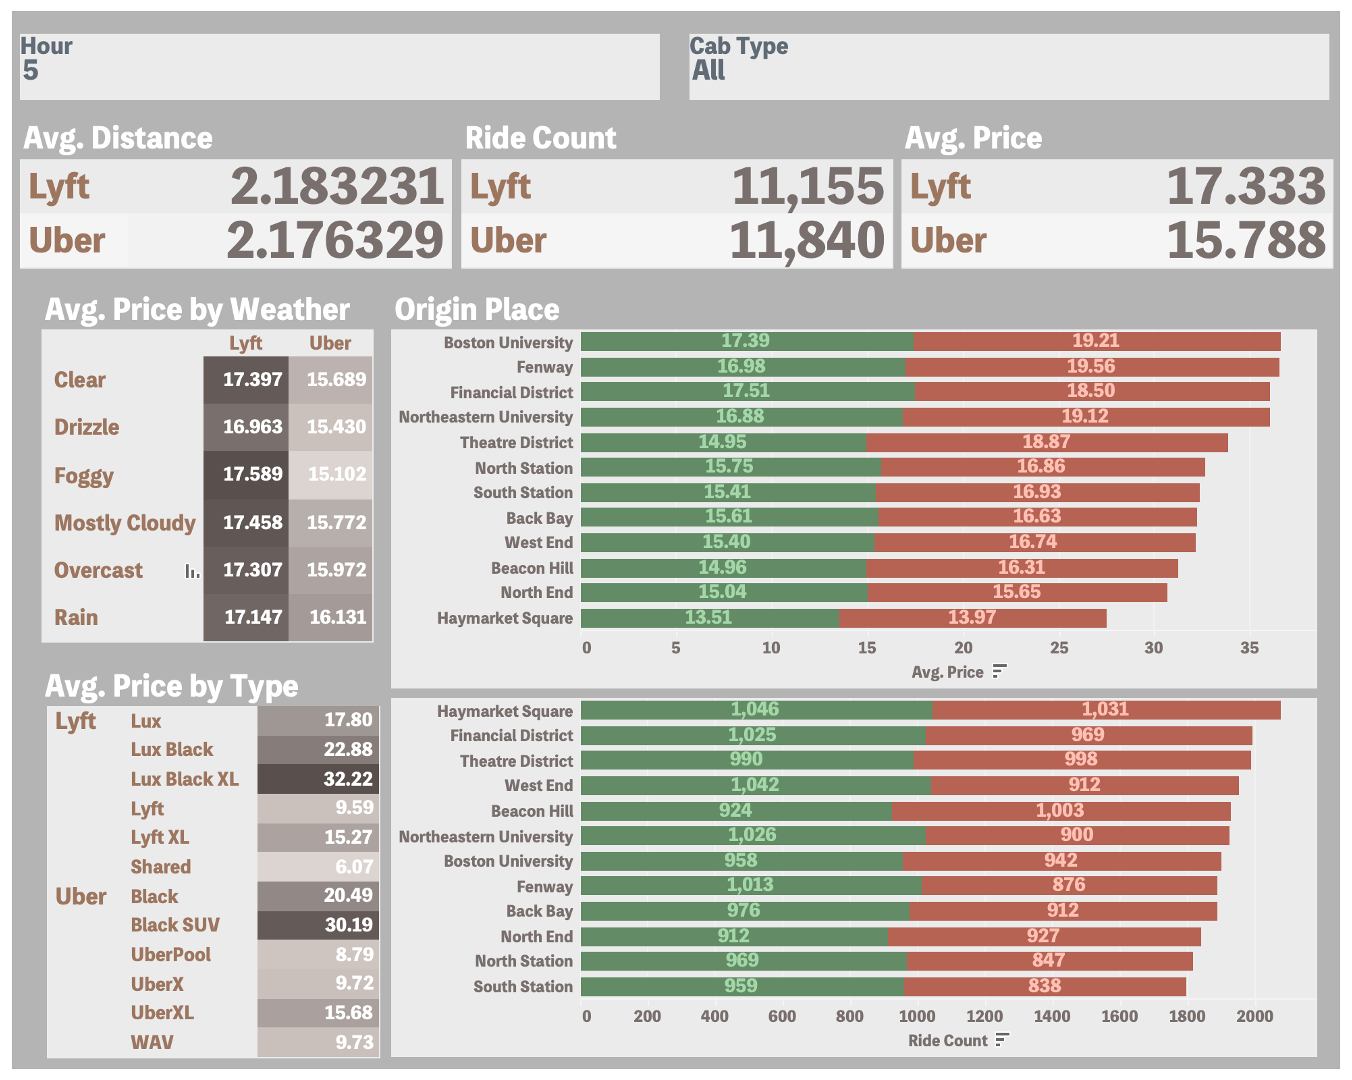

## Conclusions

This study analyzed Uber and Lyft ride data in Boston to understand factors influencing customer choices and service performance. The logistic regression model revealed a modest accuracy of 54%, indicating that while price impacts choice, it is not the sole determinant. The SQL analysis highlighted that Uber’s lower prices and higher ride counts reflect its appeal to cost-conscious customers, while Lyft’s higher prices suggest different pricing strategies.
Temporal analysis showed peak ride times and variable pricing patterns, and spatial analysis revealed high-demand areas with higher average prices. Weather conditions also influenced pricing, with less favorable weather leading to higher charges.
These insights emphasize the importance for rideshare companies to refine pricing and demand strategies. Understanding these patterns can help Uber and Lyft enhance service quality and adapt to customer needs in a competitive market.

## Challenges

Due to Google Cloud Platform’s file upload limit of 100MB, and with the original dataset being around 360MB, I initially performed data preprocessing in Colab using Python. This involved dropping null values and removing unused columns to reduce the dataset size. After cleaning, I exported the refined data as a new CSV file and uploaded it to GCP for further analysis.
Ideally, data cleaning and preprocessing would be conducted directly using SQL queries on GCP. However, given the file size limitation, I had to downsize the dataset to facilitate this analysis.
